<a href="https://colab.research.google.com/github/lmcanavals/analytics_visualization/blob/main/notebooks/ac_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
BASE_URL = "https://raw.githubusercontent.com/lmcanavals/avd/main/data/"
LOANS_INCOME_CSV   = f"{BASE_URL}loans_income.csv"
SP500_DATA_CSV     = f"{BASE_URL}sp500_data.csv.gz"

Seed nos permite establecer la semilla de números aleatorios, debe ser un valor dificil de obtener. Pero para temas de ejemplos, se usa una constante.

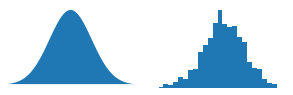

In [ ]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

## Muestreo

In [ ]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
19670,84000.0,Data
47158,49000.0,Data
38921,125000.0,Data
44354,100000.0,Data
28613,106000.0,Data


In [ ]:
results.shape

(3000, 2)

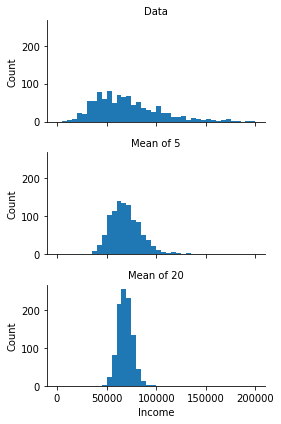

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

68760.51844
55734.1


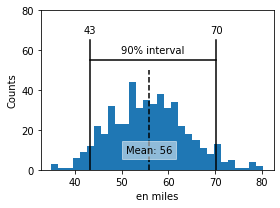

In [ ]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
results = results / 1000

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlabel('en miles')
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## QQ-Plots

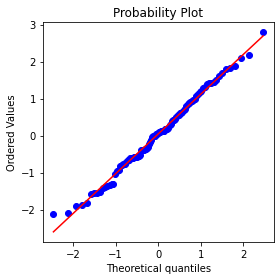

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

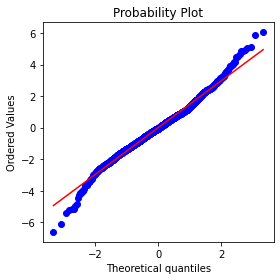

In [ ]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px['NFLX']
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
ar = np.array([1, 2, 4, 7, 9])
np.diff(np.log(ar))

array([0.69314718, 0.69314718, 0.55961579, 0.25131443])

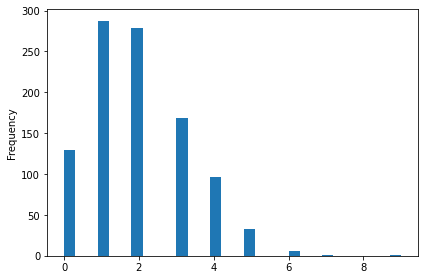

In [ ]:
sample = stats.poisson.rvs(2, size=1000)

pd.Series(sample).plot.hist(bins=30)

plt.tight_layout()
plt.show()

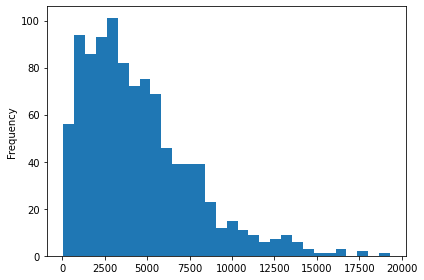

In [ ]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=1000)

pd.Series(sample).plot.hist(bins=30)

plt.tight_layout()
plt.show()